In [60]:
%matplotlib inline

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import pandas as pd
sys.path.append('../')

In [5]:
from data_manips import load_data
df = load_data("../../input/RNTI_articles_export_fixed1347_ids.txt")

#How many authors there are?

5290


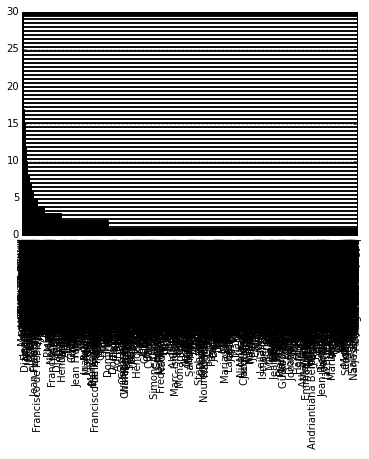

In [61]:
co_authors = df["authors"].tolist()
co_authors[0]
splited_authors = [a.split(",") for a in co_authors]
splited_authors[0]
single_authors = list(itertools.chain.from_iterable(splited_authors))
single_authors[0]
single_authors = [s.encode("utf8") for s in single_authors]
print len(single_authors)
s_authors = pd.Series(single_authors)
vc = s_authors.value_counts()
# vc = vc.sort_index()

vc.plot(kind='bar')


So there are 5290 authors (__without__ name disambiguation) in total. There is a exponential law regarding the number of pubs. Around 75% of them have published only once. The first 10 authors, according to number of pubs are:

In [63]:
list(vc.iteritems())[:10]

[(' Pascal Poncelet', 30),
 (' Omar Boussaid', 29),
 (' Maguelonne Teisseire', 28),
 (' Yves Lechevallier', 25),
 (' Anne Laurent', 24),
 (' Olivier Teste', 22),
 (' Mathieu Roche', 22),
 (' Fadila Bentayeb', 21),
 (' Fabrice Guillet', 21),
 (' Henri Briand', 21)]